In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
EXP_DIR = Path('rust_2024')
EXP_DIR = Path('old_and_new_rust')

features_df = pd.read_csv(f"{EXP_DIR}/features.csv")

In [3]:
features_df

,dir,name,450_all_pixels_mean,454_all_pixels_mean,458_all_pixels_mean,462_all_pixels_mean,466_all_pixels_mean,470_all_pixels_mean,474_all_pixels_mean,478_all_pixels_mean,...,NPCI,ARI,GI,TCARI,PSRI,RVSI,NRI,YRI,class,class_generalized
0,csv/sep-wheat-1-jan/2022_01_01/wheat_contr1_000,wheat-control-1_000_000_snapshot_view__0.csv,4941.479439,4941.479439,4941.479439,4977.307477,5040.825234,4991.751402,4930.240187,4842.970093,...,-0.142764,0.000004,1.242477,3113.740493,-0.070486,-470.085047,0.066393,4014.065737,"exp=2022_jan,group=control,day=1",health
1,csv/sep-wheat-1-jan/2022_01_01/wheat_contr1_000,wheat-control-1_000_000_snapshot_view__1.csv,4987.937374,4987.937374,4987.937374,5012.274747,5090.502020,5088.979798,5060.031313,4991.571717,...,-0.120347,0.000001,1.241017,3086.971685,-0.065000,-453.734343,0.062824,4031.917517,"exp=2022_jan,group=control,day=1",health
2,csv/sep-wheat-1-jan/2022_01_01/wheat_contr1_000,wheat-control-1_000_000_snapshot_view__2.csv,5131.405077,5131.405077,5131.405077,5163.204194,5188.317881,5144.284768,5075.145695,4981.032009,...,-0.137823,0.000007,1.252729,3703.137264,-0.066974,-438.977373,0.076130,4107.751659,"exp=2022_jan,group=control,day=1",health
3,csv/sep-wheat-1-jan/2022_01_01/wheat_contr1_000,wheat-control-1_000_000_snapshot_view__3.csv,5392.503365,5392.503365,5409.051144,5458.592194,5430.682369,5384.908479,5306.577389,5206.429341,...,-0.128408,0.000017,1.222593,4072.809843,-0.066830,-394.759758,0.056755,4132.697695,"exp=2022_jan,group=control,day=1",health
4,csv/sep-wheat-1-jan/2022_01_01/wheat_contr1_000,wheat-control-1_000_000_snapshot_view__4.csv,5016.256334,5016.256334,5016.256334,5032.816692,5112.275708,5110.388972,5051.102832,4987.733234,...,-0.120077,0.000002,1.220359,2765.118010,-0.060123,-451.721311,0.055149,4004.222971,"exp=2022_jan,group=control,day=1",health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,csv/Leaf rust february 2024/2024_02_17/brownru...,brownrust_ctrlexp_day6_EXPERIMENT_000_000_snap...,2195.764398,2195.764398,2195.764398,2199.790576,2207.502618,2148.926702,2075.863874,1986.507853,...,-0.531935,-0.000276,2.001123,957.128730,-0.292544,-186.280105,0.244947,1205.036539,"exp=2024_feb,group=exp,day=6",disease
2572,csv/Leaf rust february 2024/2024_02_17/brownru...,brownrust_ctrlexp_day6_EXPERIMENT_000_001_snap...,2367.250000,2367.250000,2367.250000,2367.250000,2462.500000,2507.958333,2503.250000,2412.708333,...,-0.480187,-0.000306,1.597498,375.797113,-0.530386,-36.437500,0.150905,761.396268,"exp=2024_feb,group=exp,day=6",disease
2573,csv/Leaf rust february 2024/2024_02_17/brownru...,brownrust_ctrlexp_day6_EXPERIMENT_000_001_snap...,2386.562500,2386.562500,2386.562500,2386.562500,2358.937500,2330.125000,2300.031250,2224.687500,...,-0.557999,-0.000403,1.774858,379.426227,-0.479559,-60.218750,0.185314,826.598958,"exp=2024_feb,group=exp,day=6",disease
2574,csv/Leaf rust february 2024/2024_02_17/brownru...,brownrust_ctrlexp_day6_EXPERIMENT_000_001_snap...,2518.477876,2518.477876,2516.783186,2497.823009,2447.000000,2359.933628,2251.615044,2129.592920,...,-0.557181,-0.000369,1.884786,629.576016,-0.329010,-181.345133,0.225578,1036.002152,"exp=2024_feb,group=exp,day=6",disease


In [4]:
def get_month_from_dir(dir):
    if 'november' in dir:
        return 'november'
    elif 'january' or 'jan 'in dir:
        return 'january'
    elif 'february' in dir:
        return 'february'
    else:
        raise Exception(f'Can not parse month in dir {dir}')
        
def get_exp_name_from_dir(dir) -> str:
    if 'sep-wheat-1' in dir:
        return 'rust 2022 exp 1'
    elif 'sep-wheat-2' in dir:
        return 'rust 2022 exp 2'
    elif 'sep-wheat-3' in dir:
        return 'rust 2022 exp 3'
    elif 'Leaf rust 1 november 2023' in dir:
        return 'rust 2023 november'
    elif 'Leaf rust 2 january 2024' in dir:
        return 'rust 2024 january'
    elif 'Leaf rust february 2024' in dir:
        return 'rust 2024 february'
    else:
        raise Exception(f"Undefined exp for dir {dir}")
    

In [5]:
# features_df = features_df.drop(columns=['day','exp','class_generalized_int'])

features_df.insert(0, 'day', features_df['dir'].apply(lambda s:int(s[-5])))
features_df.insert(0, 'exp', features_df['dir'].apply(get_exp_name_from_dir))
features_df['class_generalized_int'] = features_df['class_generalized'].apply(lambda s: 1 if s=='disease' else 0)
y_key = 'class_generalized_int'

In [6]:
features_df['exp'].value_counts()

exp
rust 2022 exp 1       700
rust 2022 exp 2       700
rust 2022 exp 3       600
rust 2024 january     205
rust 2024 february    201
rust 2023 november    170
Name: count, dtype: int64

In [7]:
features_df[['exp', 'class_generalized_int']].groupby('exp').value_counts()

exp                 class_generalized_int
rust 2022 exp 1     0                        350
                    1                        350
rust 2022 exp 2     0                        350
                    1                        350
rust 2022 exp 3     0                        300
                    1                        300
rust 2023 november  0                         85
                    1                         85
rust 2024 february  1                        101
                    0                        100
rust 2024 january   1                        103
                    0                        102
Name: count, dtype: int64

In [8]:
features_df.keys()

Index(['exp', 'day', 'dir', 'name', '450_all_pixels_mean',
       '454_all_pixels_mean', '458_all_pixels_mean', '462_all_pixels_mean',
       '466_all_pixels_mean', '470_all_pixels_mean',
       ...
       'ARI', 'GI', 'TCARI', 'PSRI', 'RVSI', 'NRI', 'YRI', 'class',
       'class_generalized', 'class_generalized_int'],
      dtype='object', length=668)

In [9]:
mean_keys = [key for key in features_df.keys() if 'all_pixels_mean' in key and 'all_all' not in key]
channels = [int(mean_key.split('_')[0]) for mean_key in mean_keys]

In [10]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 44}
matplotlib.rc('font', **font)
linewidth = 8

classes = [
    dict(name='control', vals=[0],color='#96E637'),
    dict(name='disease', vals=[1],color='#FF9999'),
#     dict(name='all', vals=[0,1],color='#0047AB'),
]

def draw_curves_of_sub_df(sub_df:pd.DataFrame):
    days = sorted(sub_df['day'].unique())
    fig, axes = plt.subplots(ncols=len(days), nrows=1, figsize=(len(days) * 9, 6))
    
    for class_dict in classes:
        class_name = class_dict['name']
        class_vals = class_dict['vals']
        class_color = class_dict['color']
        for day, ax in zip(days, axes):
            _sub_df = sub_df[(sub_df['class_generalized_int'].isin(class_vals))&(sub_df['day']==day)]
            assert len(_sub_df)>0
            agg_vect = _sub_df[mean_keys].mean(axis=0)
            ax.grid(True)
            ax.plot(channels, agg_vect,label=f"{exp} {class_name}",c=class_color,linewidth=linewidth)
#             ax.set_ylim(500, 3000)
            ax.set_title(f"day = {day}")
#             ax.set_xlabel('wavelength (nm)')
#             ax.set_ylabel('reflectance')
#     plt.legend()
    plt.tight_layout()
    plt.show()


# Curves

------------------------------ rust 2022 exp 1 -------------------------------------


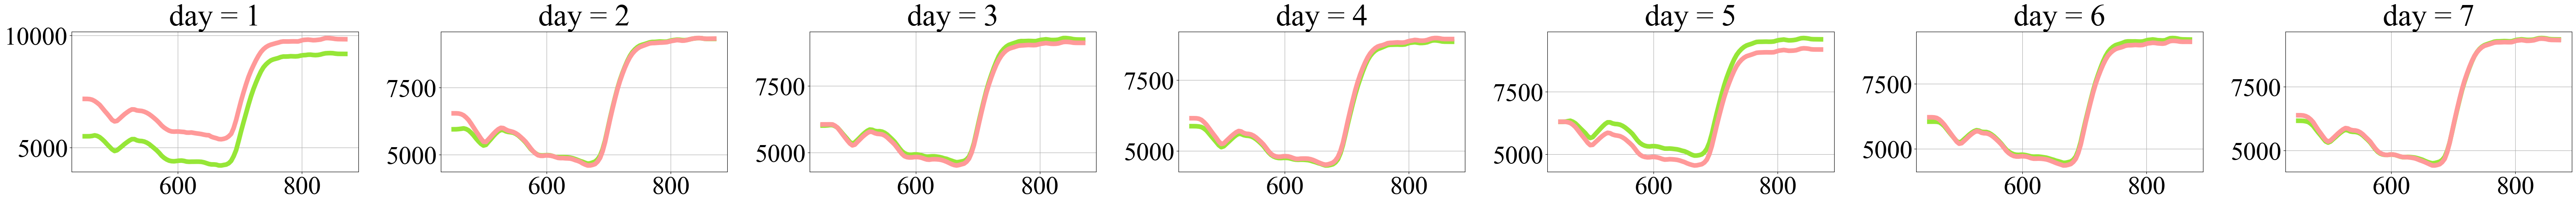





------------------------------ rust 2022 exp 2 -------------------------------------


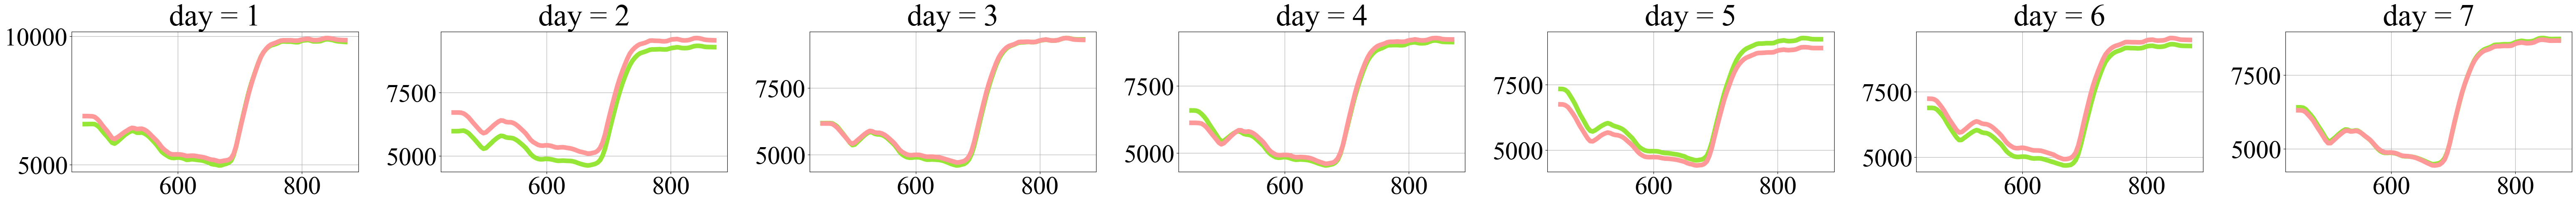





------------------------------ rust 2022 exp 3 -------------------------------------


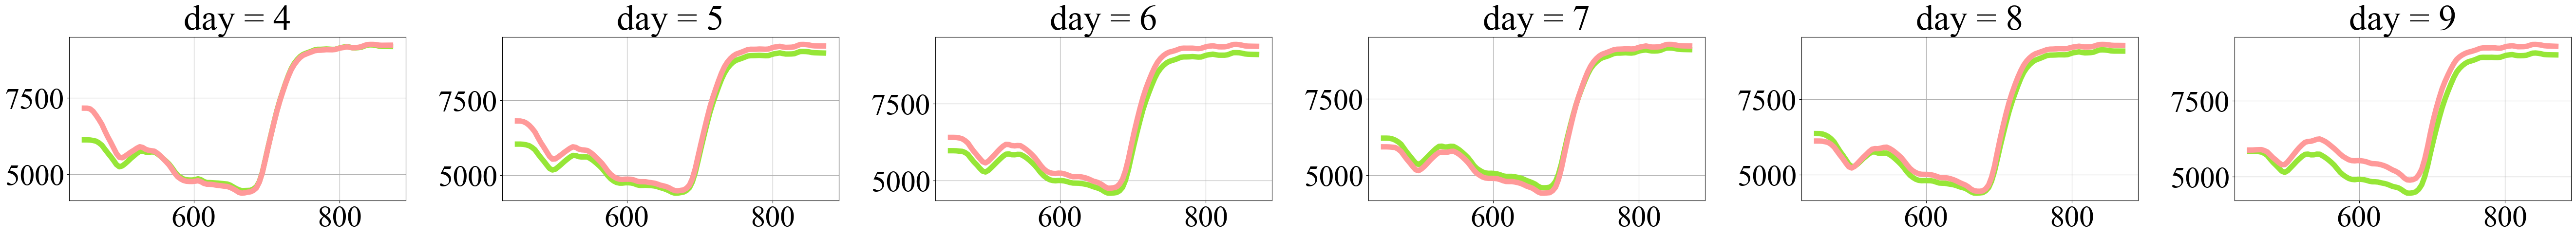





------------------------------ rust 2023 november -------------------------------------


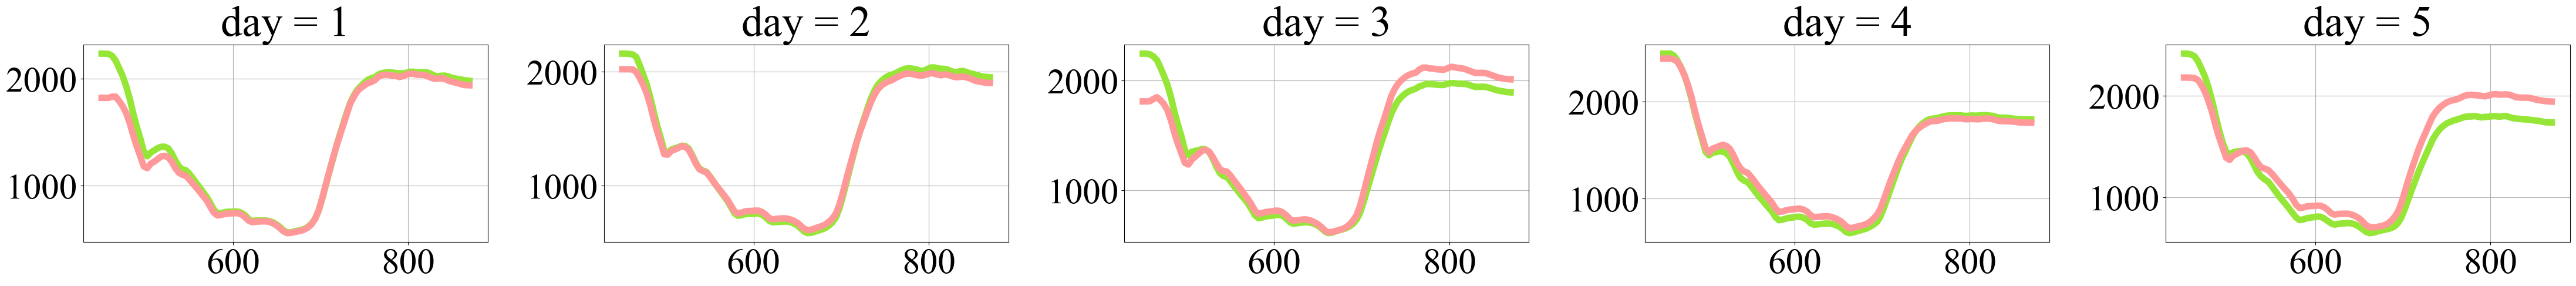





------------------------------ rust 2024 january -------------------------------------


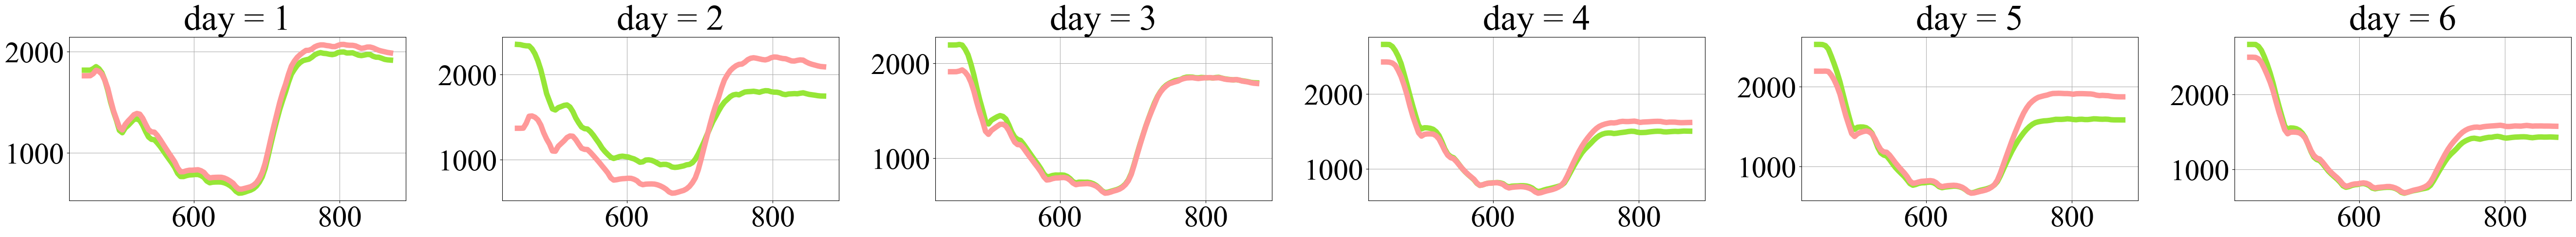





------------------------------ rust 2024 february -------------------------------------


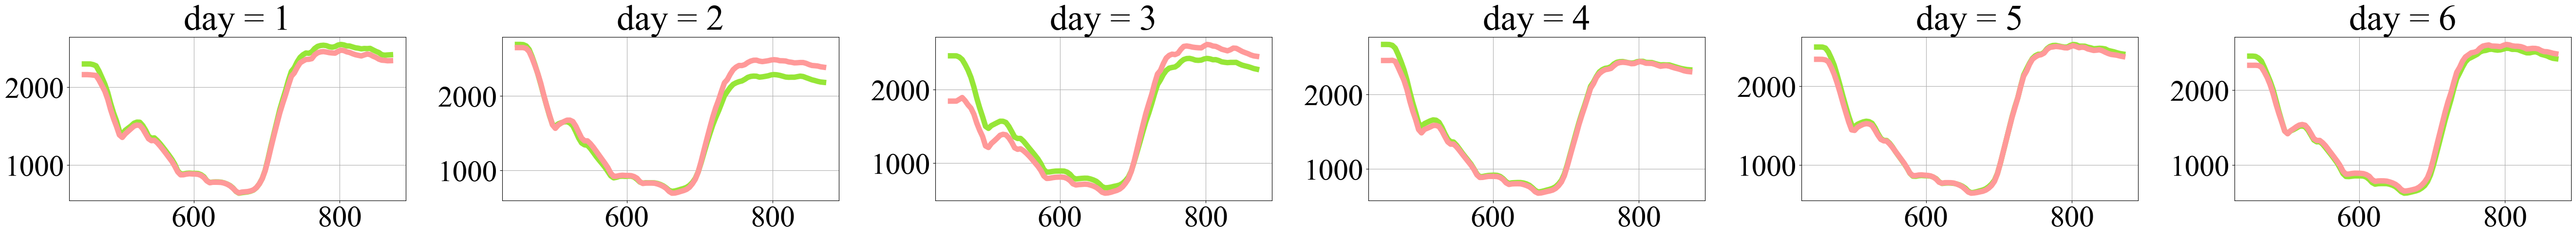

In [11]:
for exp in features_df['exp'].unique():
    print(f"------------------------------ {exp} -------------------------------------")
    draw_curves_of_sub_df(sub_df = features_df[(features_df['exp']==exp)])
    print('\n\n\n')

# Curves + normalization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# normalizing
scale_mean = features_df[features_df['exp']=='rust 2022 exp 1'][mean_keys].mean(axis=0).to_numpy()[np.newaxis]
scale_std = features_df[features_df['exp']=='rust 2022 exp 1'][mean_keys].std(axis=0).to_numpy()[np.newaxis]

# 0-1 scaling
norm = scale_mean.max()
scale_mean /= norm
scale_std /= norm

# std increasing
# scale_std*=2

In [13]:
def normalize_df(sub_df:pd.DataFrame)->pd.DataFrame:
    sub_df = sub_df.copy()
    if '2023' in sub_df['exp'].iloc[0] or '2024' in sub_df['exp'].iloc[0]:
        sub_df[mean_keys] = -sub_df[mean_keys]
    sub_df[mean_keys] = StandardScaler().fit_transform(sub_df[mean_keys])*scale_std+scale_mean
    return sub_df


In [14]:
features_norm_df = features_df.copy()
for exp in features_df['exp'].unique():
    for day in features_df[(features_df['exp']==exp)]['day'].unique():
        indexes = (features_df['exp']==exp)&(features_df['day']==day)
        features_norm_df[indexes] = normalize_df(features_norm_df[indexes])

------------------------------ rust 2022 exp 1 -------------------------------------


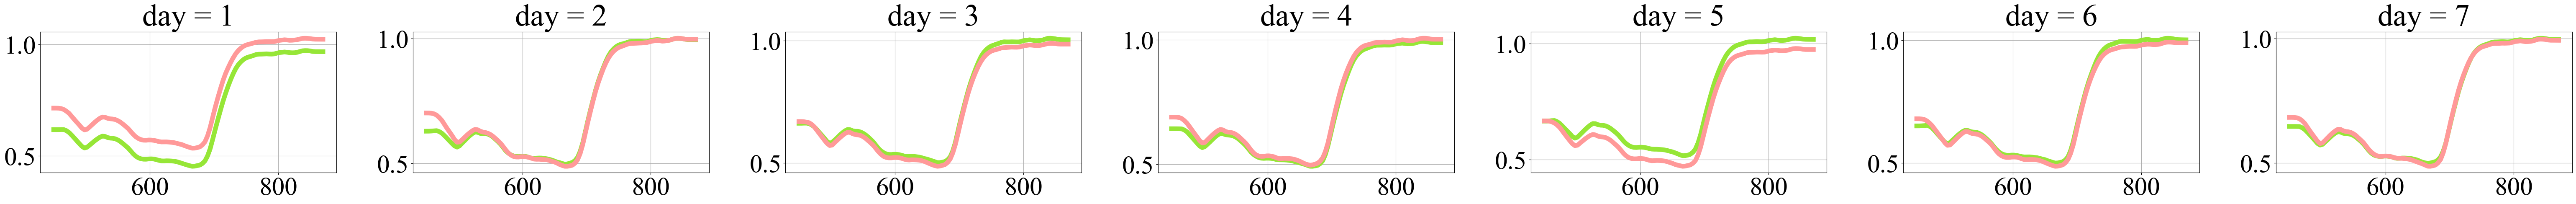





------------------------------ rust 2022 exp 2 -------------------------------------


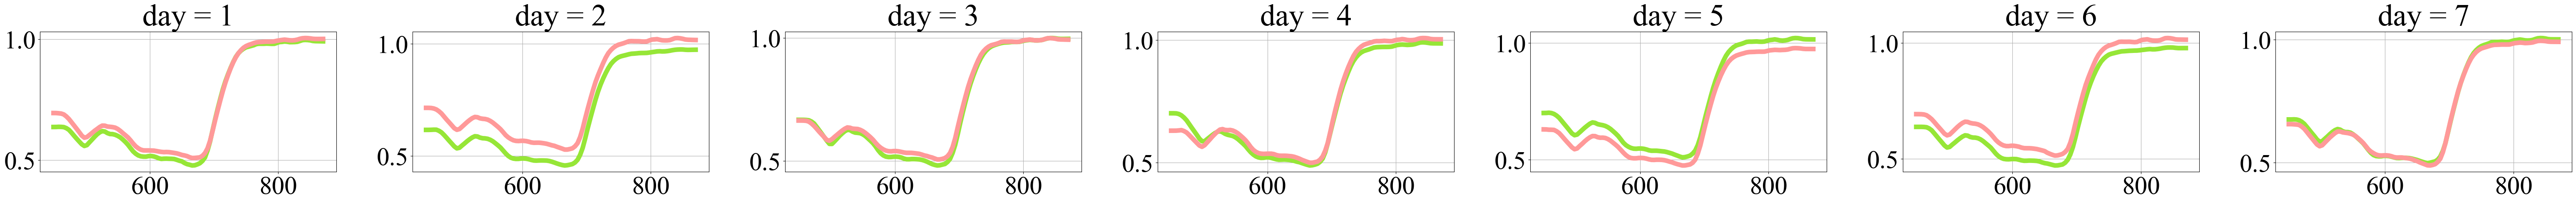





------------------------------ rust 2022 exp 3 -------------------------------------


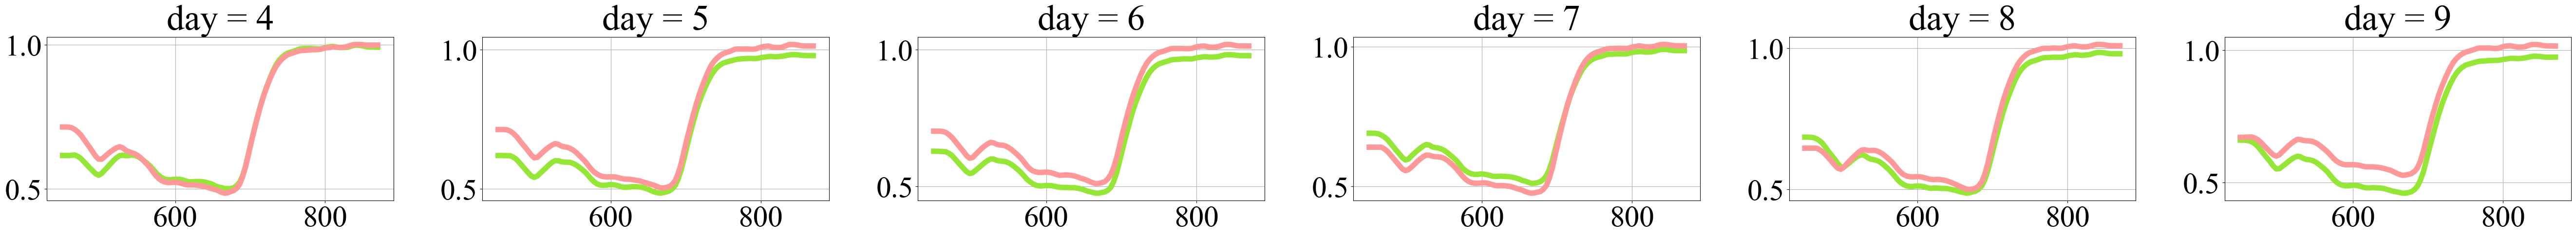





------------------------------ rust 2023 november -------------------------------------


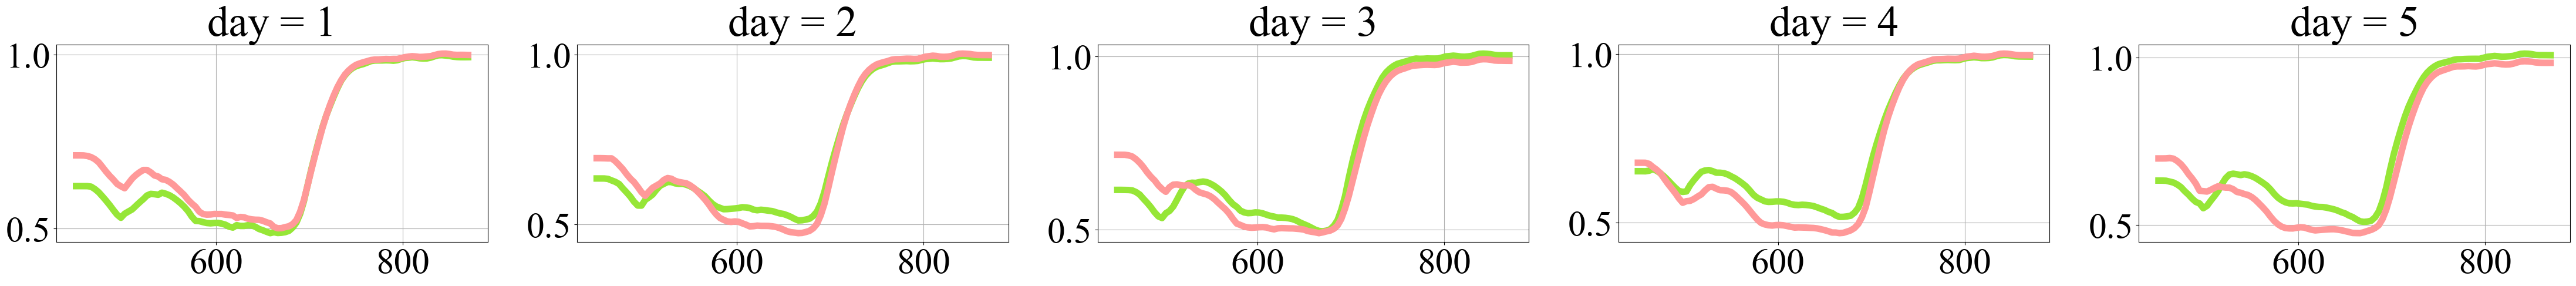





------------------------------ rust 2024 january -------------------------------------


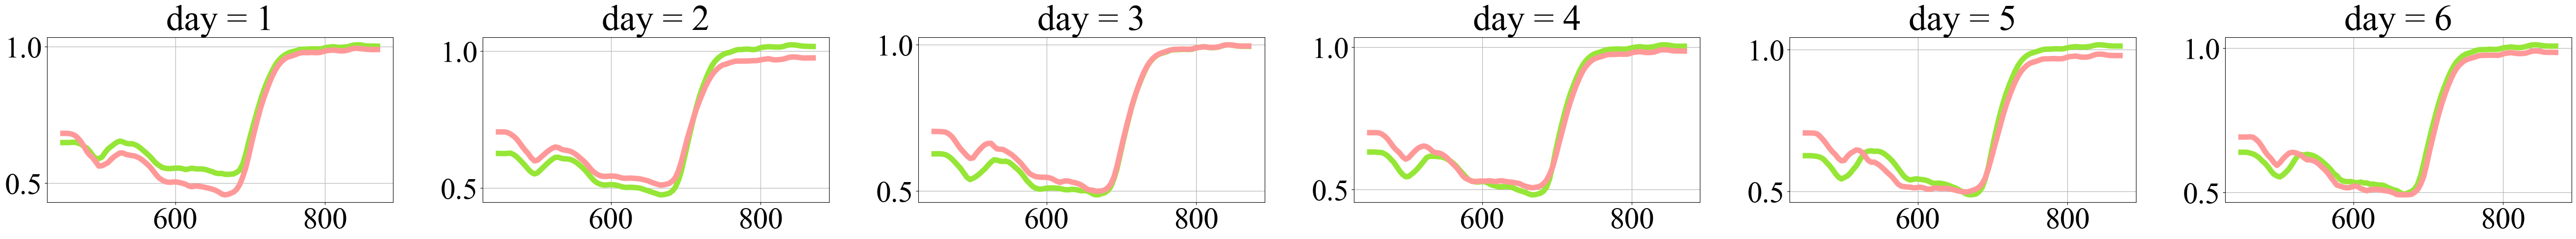





------------------------------ rust 2024 february -------------------------------------


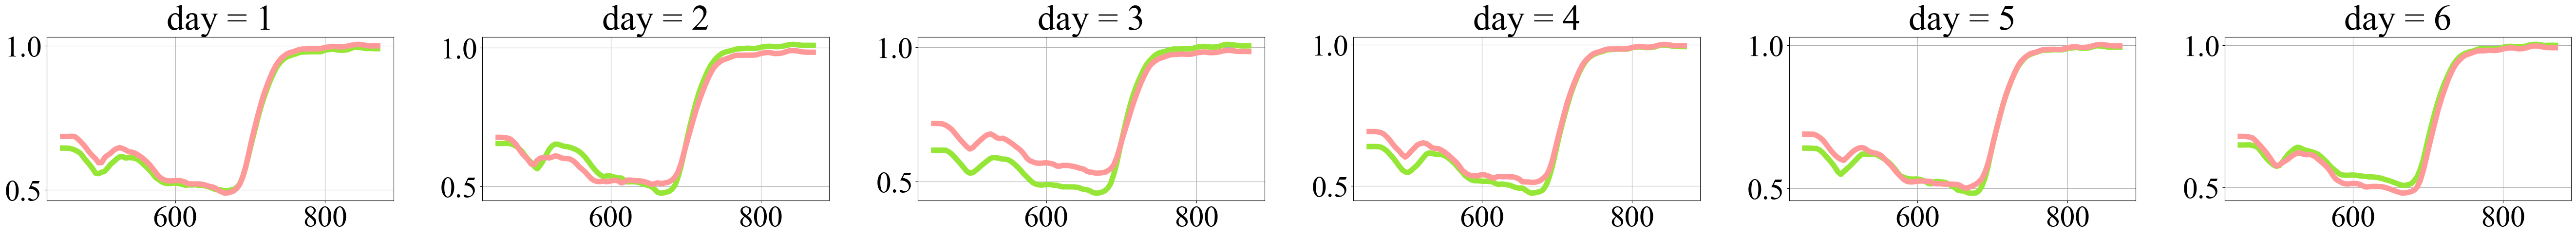

In [16]:
for exp in features_norm_df['exp'].unique():
    print(f"------------------------------ {exp} -------------------------------------")
    draw_curves_of_sub_df(sub_df = features_norm_df[(features_norm_df['exp']==exp)])
    print('\n\n\n')

# Cross-testing

In [125]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import metrics

def get_metrics_dict(name: str, y_true: np.ndarray, y_pred: np.ndarray) -> dict:
    return {
        f'{name}_accuracy': metrics.accuracy_score(y_true=y_true, y_pred=y_pred).__round__(2),
        f'{name}_auc': metrics.roc_auc_score(y_score=y_pred, y_true=y_true).__round__(2),
        f'{name}_kappa': metrics.cohen_kappa_score(y_true, y_pred).round(2),
        f'{name}_f1_health': metrics.f1_score(y_true=y_true, y_pred=y_pred, pos_label=0).round(2),
        f'{name}_f1_disease': metrics.f1_score(y_true=y_true, y_pred=y_pred, pos_label=1).round(2),
        f'{name}_recall': metrics.recall_score(y_true, y_pred, pos_label=1).round(2),
        f'{name}_precision': metrics.precision_score(y_true, y_pred, pos_label=1).round(2),
        f'{name}_confusion': metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)
    }


def fit_svm(x_train:pd.DataFrame, y_train:pd.Series):
    assert len(x_train)>10
    common_args = {'max_iter': [int(1e5)], 'random_state': [16], 'probability': [True]}
    param_grid = [
        {'C': [1e0, 1e1, 1e2, 1e3], 'kernel': ['linear'], **common_args},
        {'C': [1e0, 1e1, 1e2, 1e3], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'kernel': ['rbf', 'poly', 'sigmoid'],
         **common_args},
    ]
    clf_grid = GridSearchCV(SVC(), param_grid,cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    clf_grid.fit(X=x_train, y=y_train)
    clf = make_pipeline(clf_grid.best_estimator_)

    return clf
    
def test_model(clf, x_test:pd.DataFrame, y_test:pd.Series):
    assert len(x_test)>10
    
    samples_dict = {
        'test': {'y_true': y_test, 'y_pred': clf.predict(x_test)}
    }
    return {
            **{
                metric_key: metric_val
                for ds_name, ds_dict in samples_dict.items()
                for metric_key, metric_val in get_metrics_dict(name=ds_name, **ds_dict).items()
            }
        }


In [126]:
exp_subsets = [
    dict(
        name = 'rust 2022 exp 1',
        indexes_all = (features_norm_df['exp']=='rust 2022 exp 1'),
        indexes_selected = (features_norm_df['exp']=='rust 2022 exp 1')&(features_norm_df['day'].isin([1,2,4]))
    ),
    dict(
        name = 'rust 2022 exp 2',
        indexes_all = (features_norm_df['exp']=='rust 2022 exp 2'),
        indexes_selected = (features_norm_df['exp']=='rust 2022 exp 2')&(features_norm_df['day'].isin([1,2,6]))
    ),
    dict(
        name = 'rust 2022 exp 3',
        indexes_all = (features_norm_df['exp']=='rust 2022 exp 3'),
        indexes_selected = (features_norm_df['exp']=='rust 2022 exp 3')&(features_norm_df['day'].isin([4,5,6]))
    ),
    dict(
        name = 'rust 2023 november',
        indexes_all = (features_norm_df['exp']=='rust 2023 november'),
        indexes_selected = (features_norm_df['exp']=='rust 2023 november')&(features_norm_df['day'].isin([1,2,3,5]))
    ),
    dict(
        name = 'rust 2024 january',
        indexes_all = (features_norm_df['exp']=='rust 2024 january'),
        indexes_selected = (features_norm_df['exp']=='rust 2024 january')&(features_norm_df['day'].isin([2,3,4,5,6]))
    ),
    dict(
        name = 'rust 2024 february',
        indexes_all = (features_norm_df['exp']=='rust 2024 february'),
        indexes_selected = (features_norm_df['exp']=='rust 2024 february')&(features_norm_df['day'].isin([1,3,4,5])) 
    )
]




res_list = []
for train_subset in exp_subsets:
    model = fit_svm(
        x_train = features_norm_df[train_subset['indexes_selected']][mean_keys],
        y_train = features_norm_df[train_subset['indexes_selected']]['class_generalized_int']   
    )
    for test_subset in exp_subsets:
        res_dict = test_model(
                clf=model,
                x_test = features_norm_df[test_subset['indexes_selected']][mean_keys],
                y_test = features_norm_df[test_subset['indexes_selected']]['class_generalized_int'],
            )
        res_list.append({'train_subset':train_subset["name"],'test_subset':test_subset["name"],**res_dict})

test_cv_df = pd.DataFrame(res_list)

C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\danil\anaconda3\envs\scienv\lib\site-packages\sklearn\svm\_

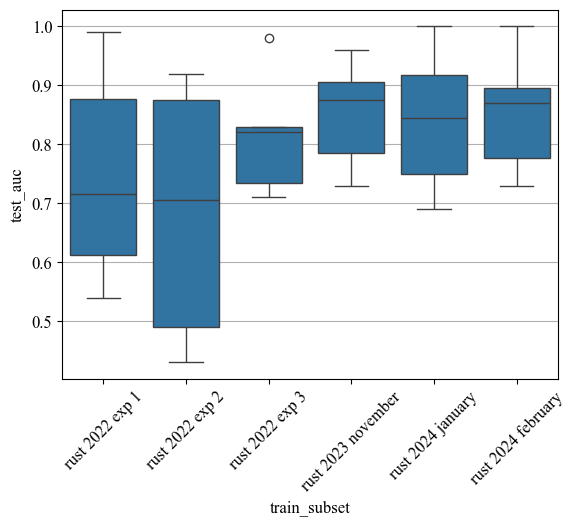

,test_accuracy,test_kappa,test_auc,test_f1_disease,test_f1_health,test_precision,test_recall
train_subset,,,,,,,
rust 2022 exp 1,0.745000,0.490000,0.745000,0.735000,0.756667,0.750000,0.718333
rust 2022 exp 2,0.685000,0.365000,0.685000,0.681667,0.685000,0.688333,0.668333
rust 2022 exp 3,0.811667,0.623333,0.811667,0.815000,0.805000,0.808333,0.826667
rust 2023 november,0.851667,0.706667,0.851667,0.846667,0.858333,0.881667,0.813333
rust 2024 february,0.853333,0.705000,0.853333,0.856667,0.853333,0.846667,0.865000
rust 2024 january,0.840000,0.685000,0.840000,0.831667,0.851667,0.865000,0.800000


In [134]:
import seaborn as sns

font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 12}
matplotlib.rc('font', **font)
plt.grid()
sns.boxplot(data=test_cv_df, x="train_subset", y="test_auc")
plt.xticks(rotation=45)
plt.show()

test_cv_df[['train_subset','test_accuracy','test_kappa','test_auc','test_f1_disease','test_f1_health','test_precision','test_recall']].groupby('train_subset').mean()

accuracy = 0.73
accuracy = 0.75
accuracy = 0.86
accuracy = 0.90
accuracy = 0.88
accuracy = 1.00


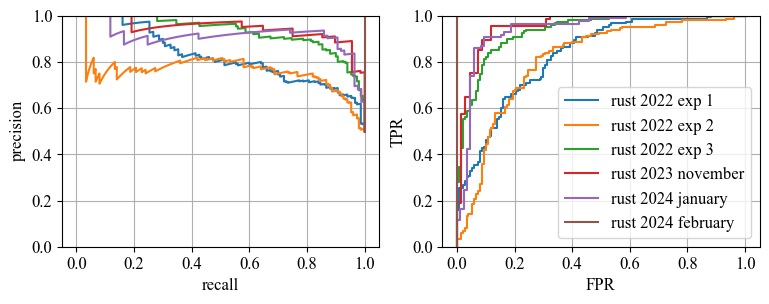

In [164]:
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 12}
matplotlib.rc('font', **font)

best_train_subset_id = -1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
for ax in axes:
    ax.grid()


for test_subset in exp_subsets:
    x_test = features_norm_df[test_subset['indexes_selected']][mean_keys]
    y_test = features_norm_df[test_subset['indexes_selected']]['class_generalized_int']

    y_pred = model.predict_proba(x_test)
    y_pred_class = y_pred.argmax(axis=-1)
    y_pred_proba = y_pred[:,1]

    print(f'accuracy = {metrics.accuracy_score(y_pred_class,y_test):.2f}')
    
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
    axes[0].plot(recall, precision, label=test_subset['name'])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    axes[1].plot(fpr, tpr, label=test_subset['name'])



axes[1].legend()
for ax in axes:    
    ax.set_ylim(0,1)
 
axes[0].set_xlabel('recall')
axes[0].set_ylabel('precision')

axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')

plt.show()